# Predictive Modeling for Breast Cancer Diagnosis

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd /Users/vishesh/Documents/Major-Project-Deployment/Pages

/Users/vishesh/Documents/Major-Project-Deployment/Pages


# Data Exploration

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [4]:
col_names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df_bcan = pd.read_csv(url, names = col_names)
df_bcan

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
df_bcan.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df_bcan.shape

(699, 11)

In [7]:
df_bcan.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df_bcan.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
uniform_cell_size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
uniform_cell_shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single_epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [9]:
df_bcan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [10]:
df_bcan.dtypes

id                         int64
clump_thickness            int64
uniform_cell_size          int64
uniform_cell_shape         int64
marginal_adhesion          int64
single_epithelial_size     int64
bare_nuclei               object
bland_chromatin            int64
normal_nucleoli            int64
mitoses                    int64
class                      int64
dtype: object

In [11]:
df_bcan.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [12]:
df_bcan["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

In [13]:
# The distribution of the Outcome variable was examined.
df_bcan["class"].value_counts()*100/len(df_bcan)

2    65.522175
4    34.477825
Name: class, dtype: float64

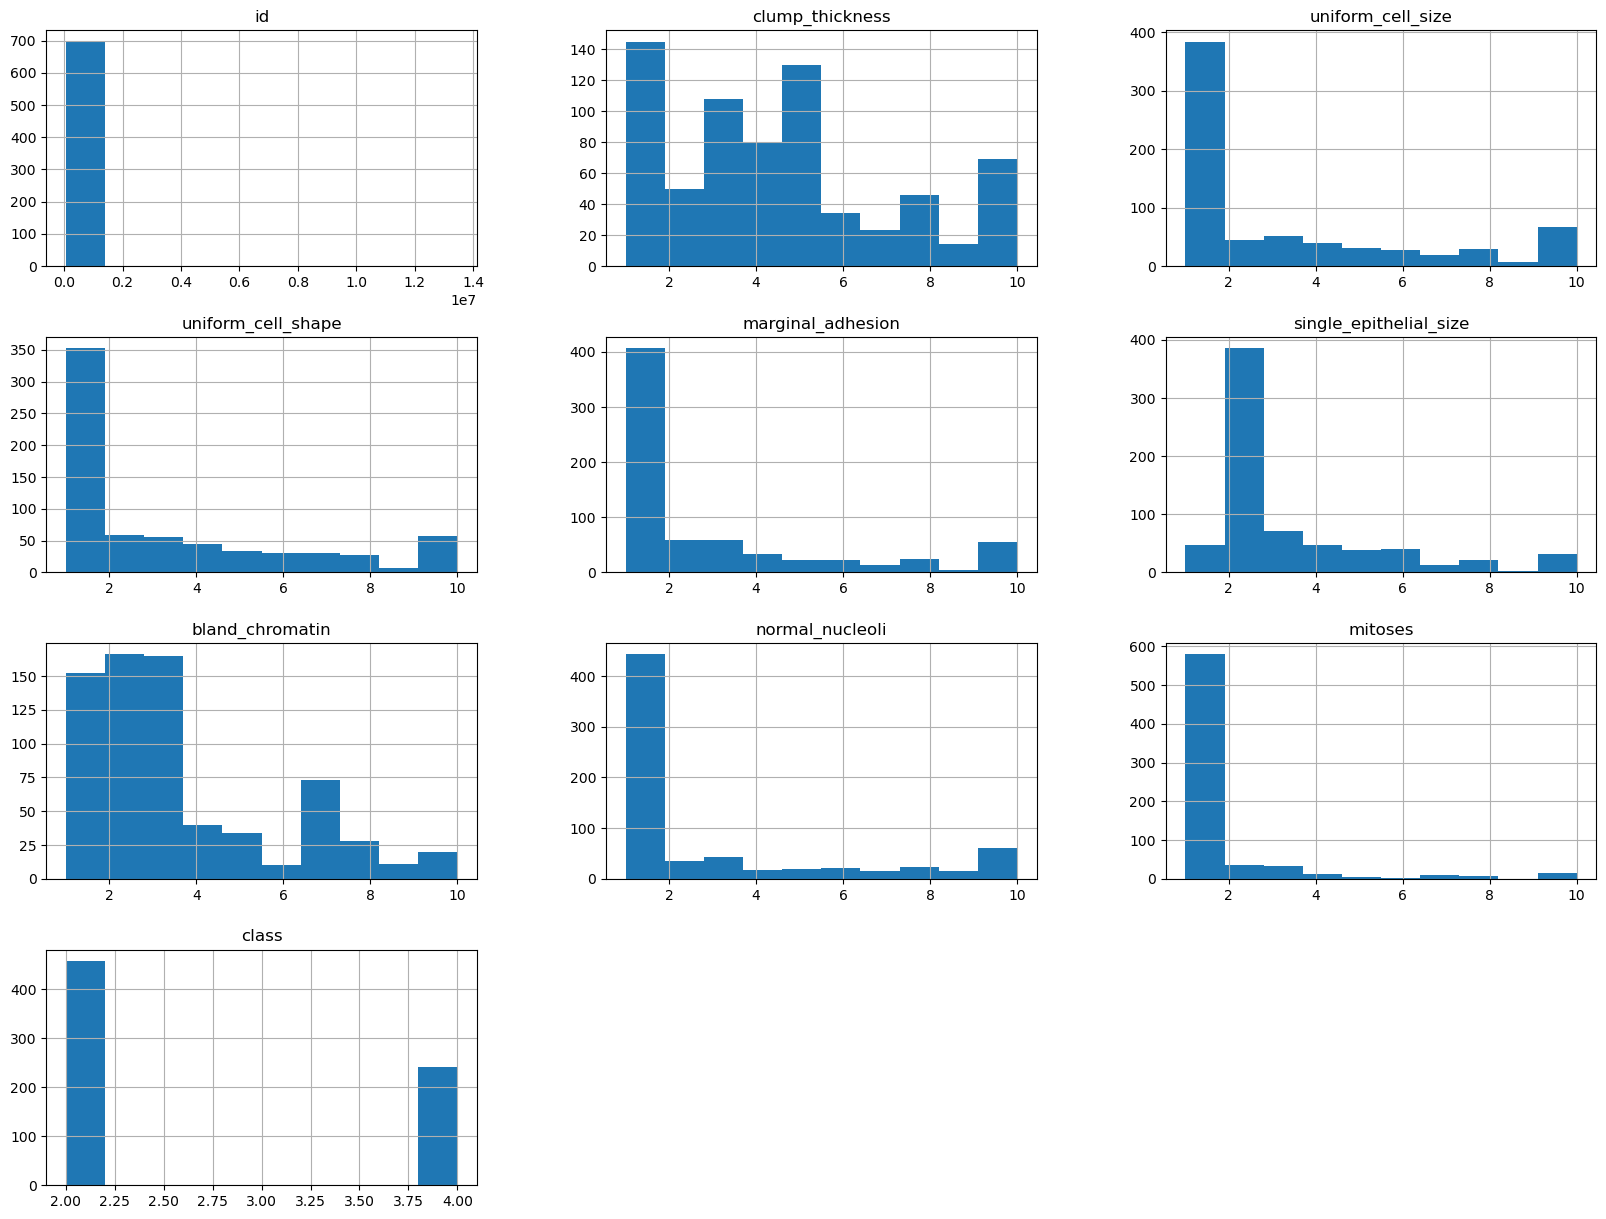

In [14]:
import matplotlib.pyplot as plt

df_bcan.hist(figsize = (20, 15))
plt.show()

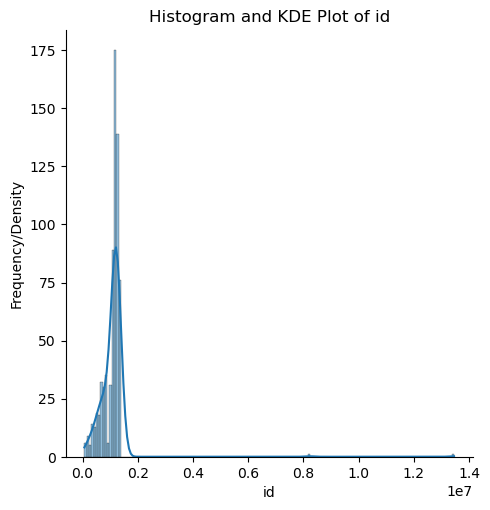

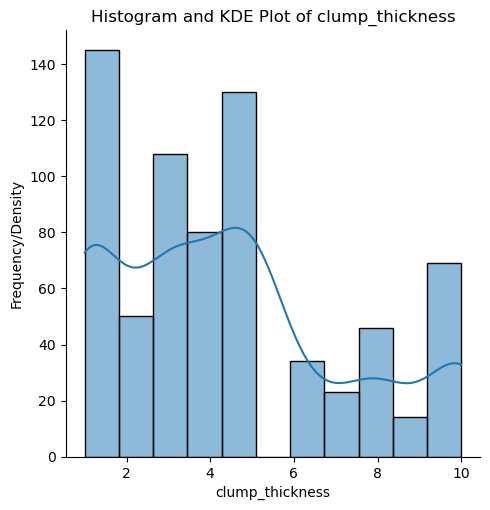

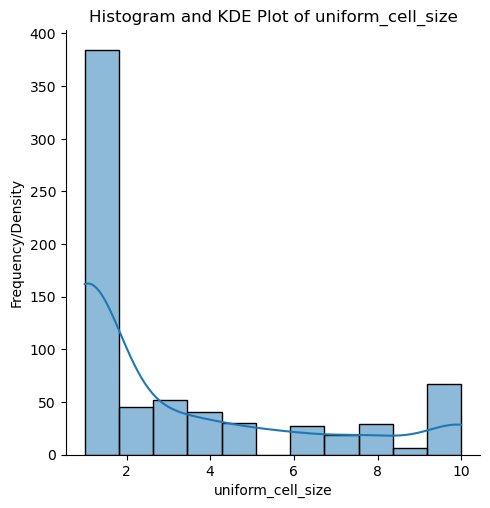

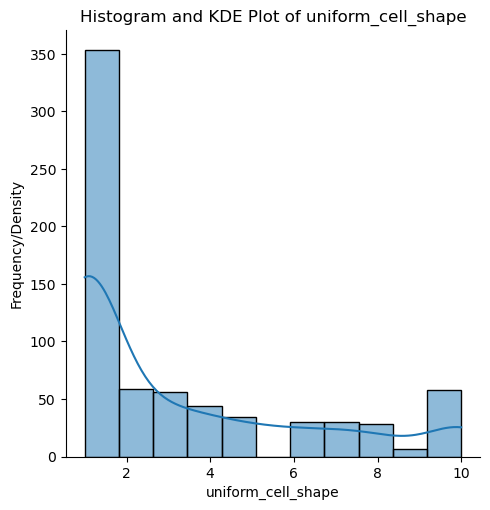

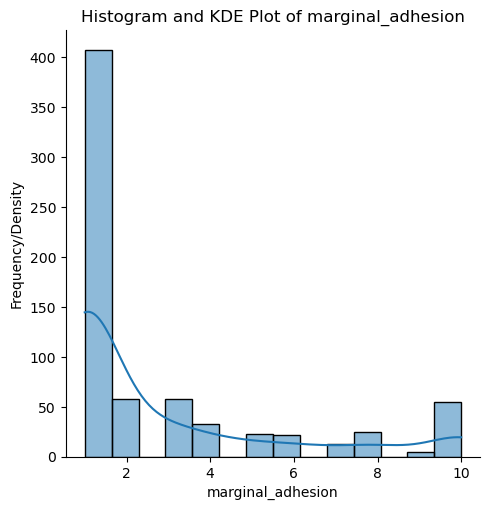

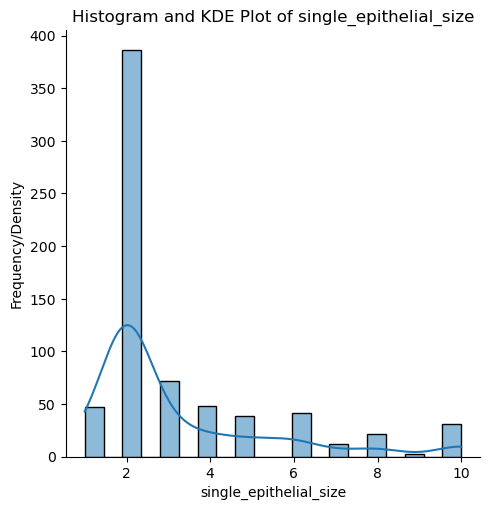

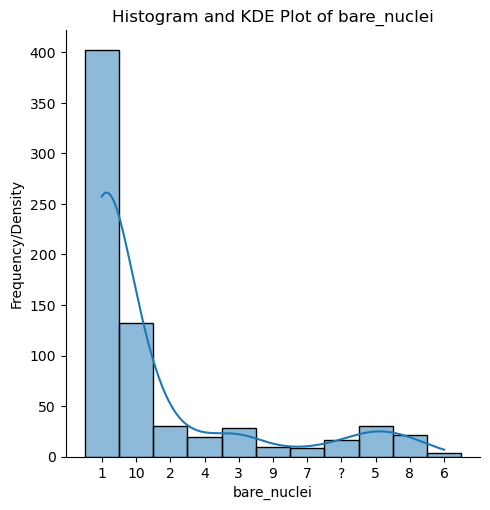

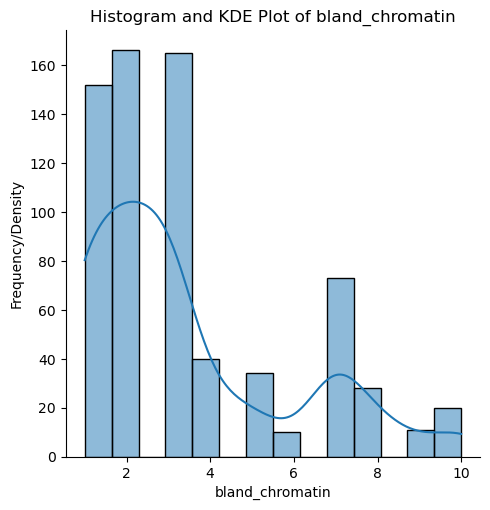

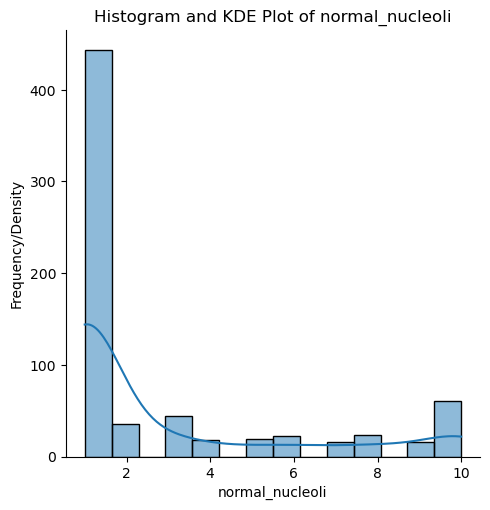

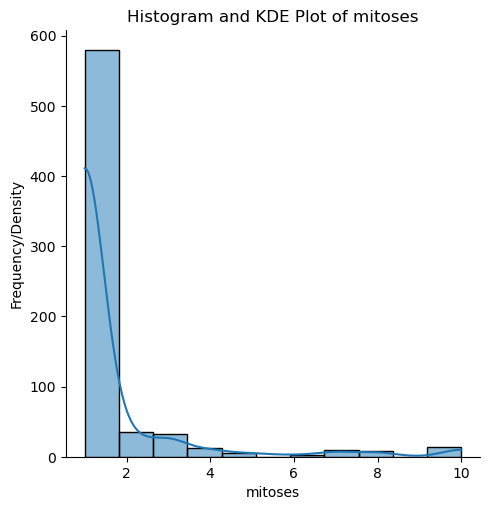

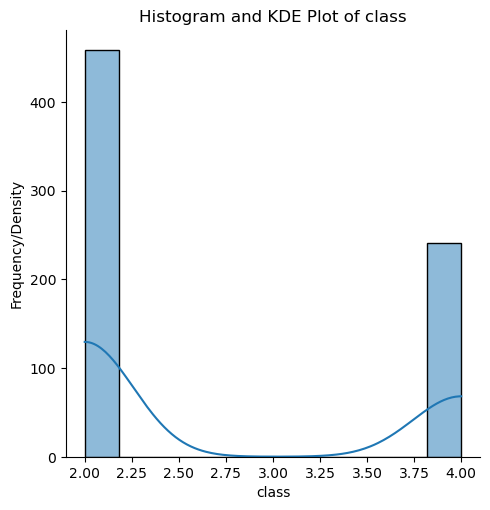

In [15]:
import seaborn as sns

for col in df_bcan.columns:
    sns.displot(df_bcan[col], kde=True)
    plt.title(f"Histogram and KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency/Density")
    plt.show()

## Observations
<br>
<br>

-The dataset includes a total of 699 records and 11 features.<br>
-Each feature is a numerical value represented as an integer or floating-point number except bare_nuclei.<br>
-One feature (e.g.bare_nuclei) contains missing data, which is represented as a ? value.<br>
-There are no NaN values in the dataset.<br>
-The Class column has two possible values: 2 indicates a Benign for Patients, while 4 indicates a Malignant diagnosis.<br>

# Data Insights

<Axes: xlabel='class', ylabel='count'>

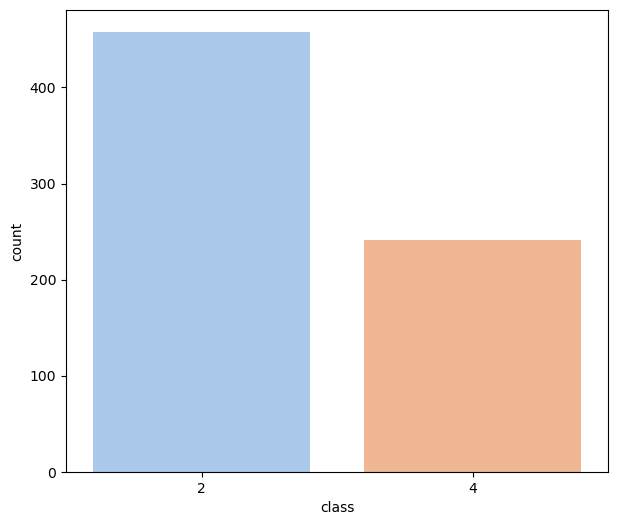

In [16]:
# Outcome countplot
plt.figure(figsize=(7,6))
sns.countplot(x='class', data=df_bcan, palette='pastel')

In [17]:
df_bcan

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<Axes: xlabel='clump_thickness', ylabel='uniform_cell_size'>

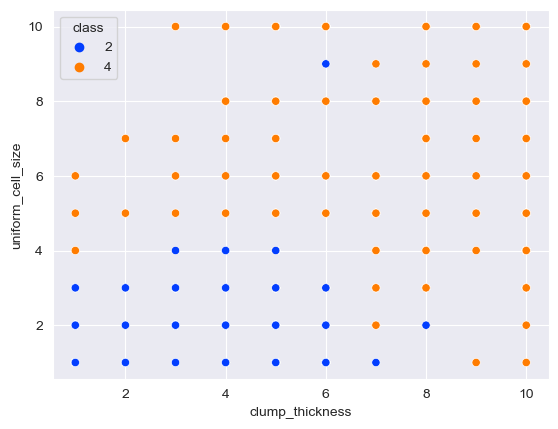

In [18]:
import seaborn as sns

sns.set_style("darkgrid")
palette = sns.color_palette("bright", 2)
sns.scatterplot(x="clump_thickness", y="uniform_cell_size", hue="class", data=df_bcan, palette=palette)

<Axes: xlabel='uniform_cell_shape', ylabel='uniform_cell_size'>

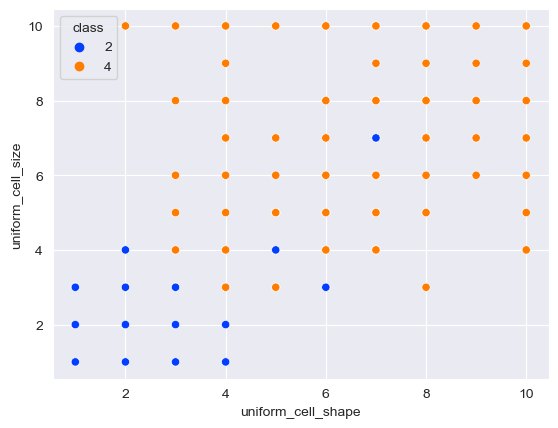

In [19]:
sns.set_style("darkgrid")
palette = sns.color_palette("bright", 2)
sns.scatterplot(x="uniform_cell_shape", y="uniform_cell_size", hue="class", data=df_bcan, palette=palette)

<Axes: xlabel='single_epithelial_size', ylabel='marginal_adhesion'>

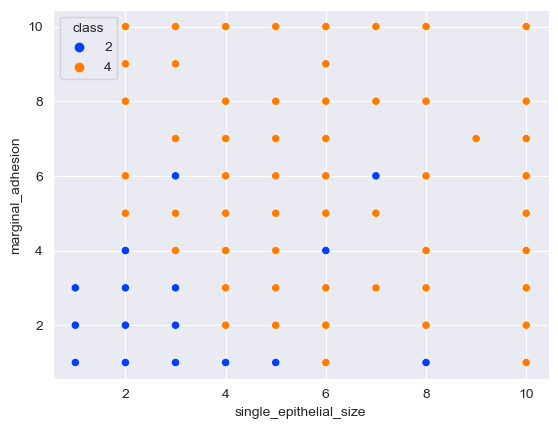

In [20]:
sns.set_style("darkgrid")
palette = sns.color_palette("bright", 2)
sns.scatterplot(x="single_epithelial_size", y="marginal_adhesion", hue="class", data=df_bcan, palette=palette)

<Axes: xlabel='bare_nuclei', ylabel='single_epithelial_size'>

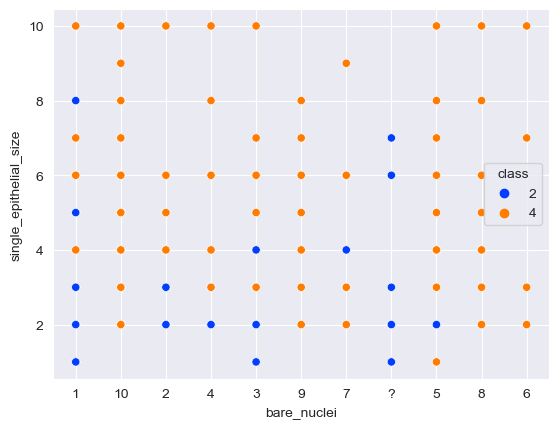

In [21]:
sns.set_style("darkgrid")
palette = sns.color_palette("bright", 2)
sns.scatterplot(x="bare_nuclei", y="single_epithelial_size", hue="class", data=df_bcan, palette=palette)

<Axes: xlabel='bland_chromatin', ylabel='normal_nucleoli'>

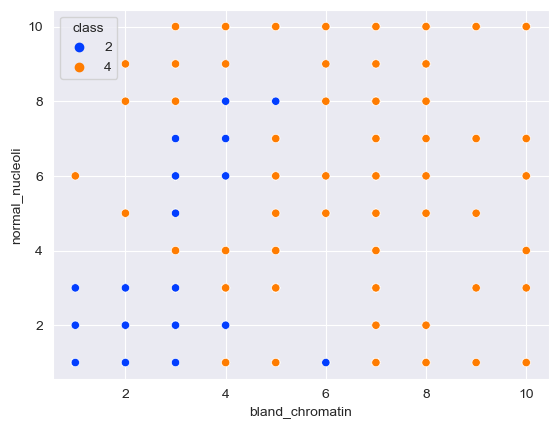

In [22]:
sns.set_style("darkgrid")
palette = sns.color_palette("bright", 2)
sns.scatterplot(x="bland_chromatin", y="normal_nucleoli", hue="class", data=df_bcan, palette=palette)

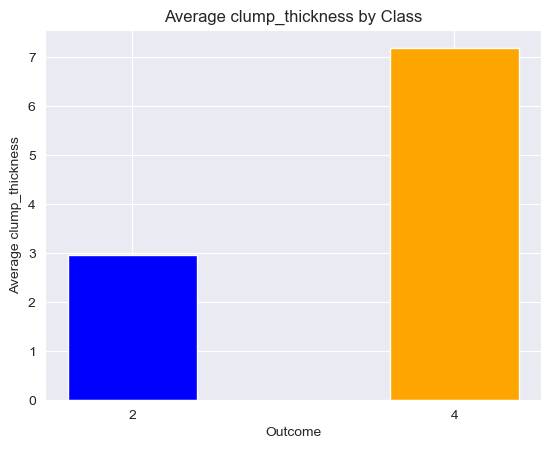

In [23]:
temp_preg = df_bcan.groupby('class')['clump_thickness'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['Blue', 'orange'])
plt.xticks([2,4])
plt.xlabel('Outcome')
plt.ylabel('Average clump_thickness')
plt.title('Average clump_thickness by Class')
plt.show()

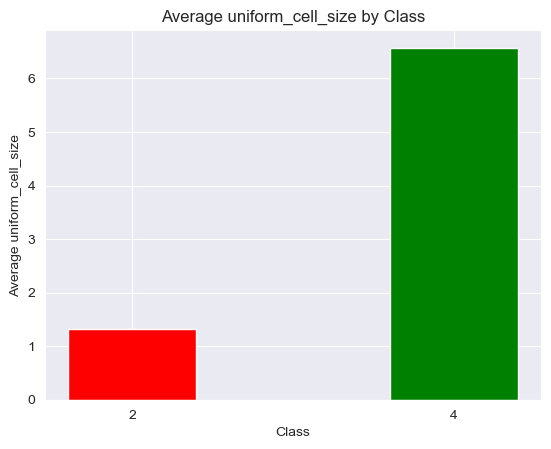

In [24]:
temp_preg = df_bcan.groupby('class')['uniform_cell_size'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['red', 'Green'])
plt.xticks([2,4])
plt.xlabel('Class')
plt.ylabel('Average uniform_cell_size')
plt.title('Average uniform_cell_size by Class')
plt.show()

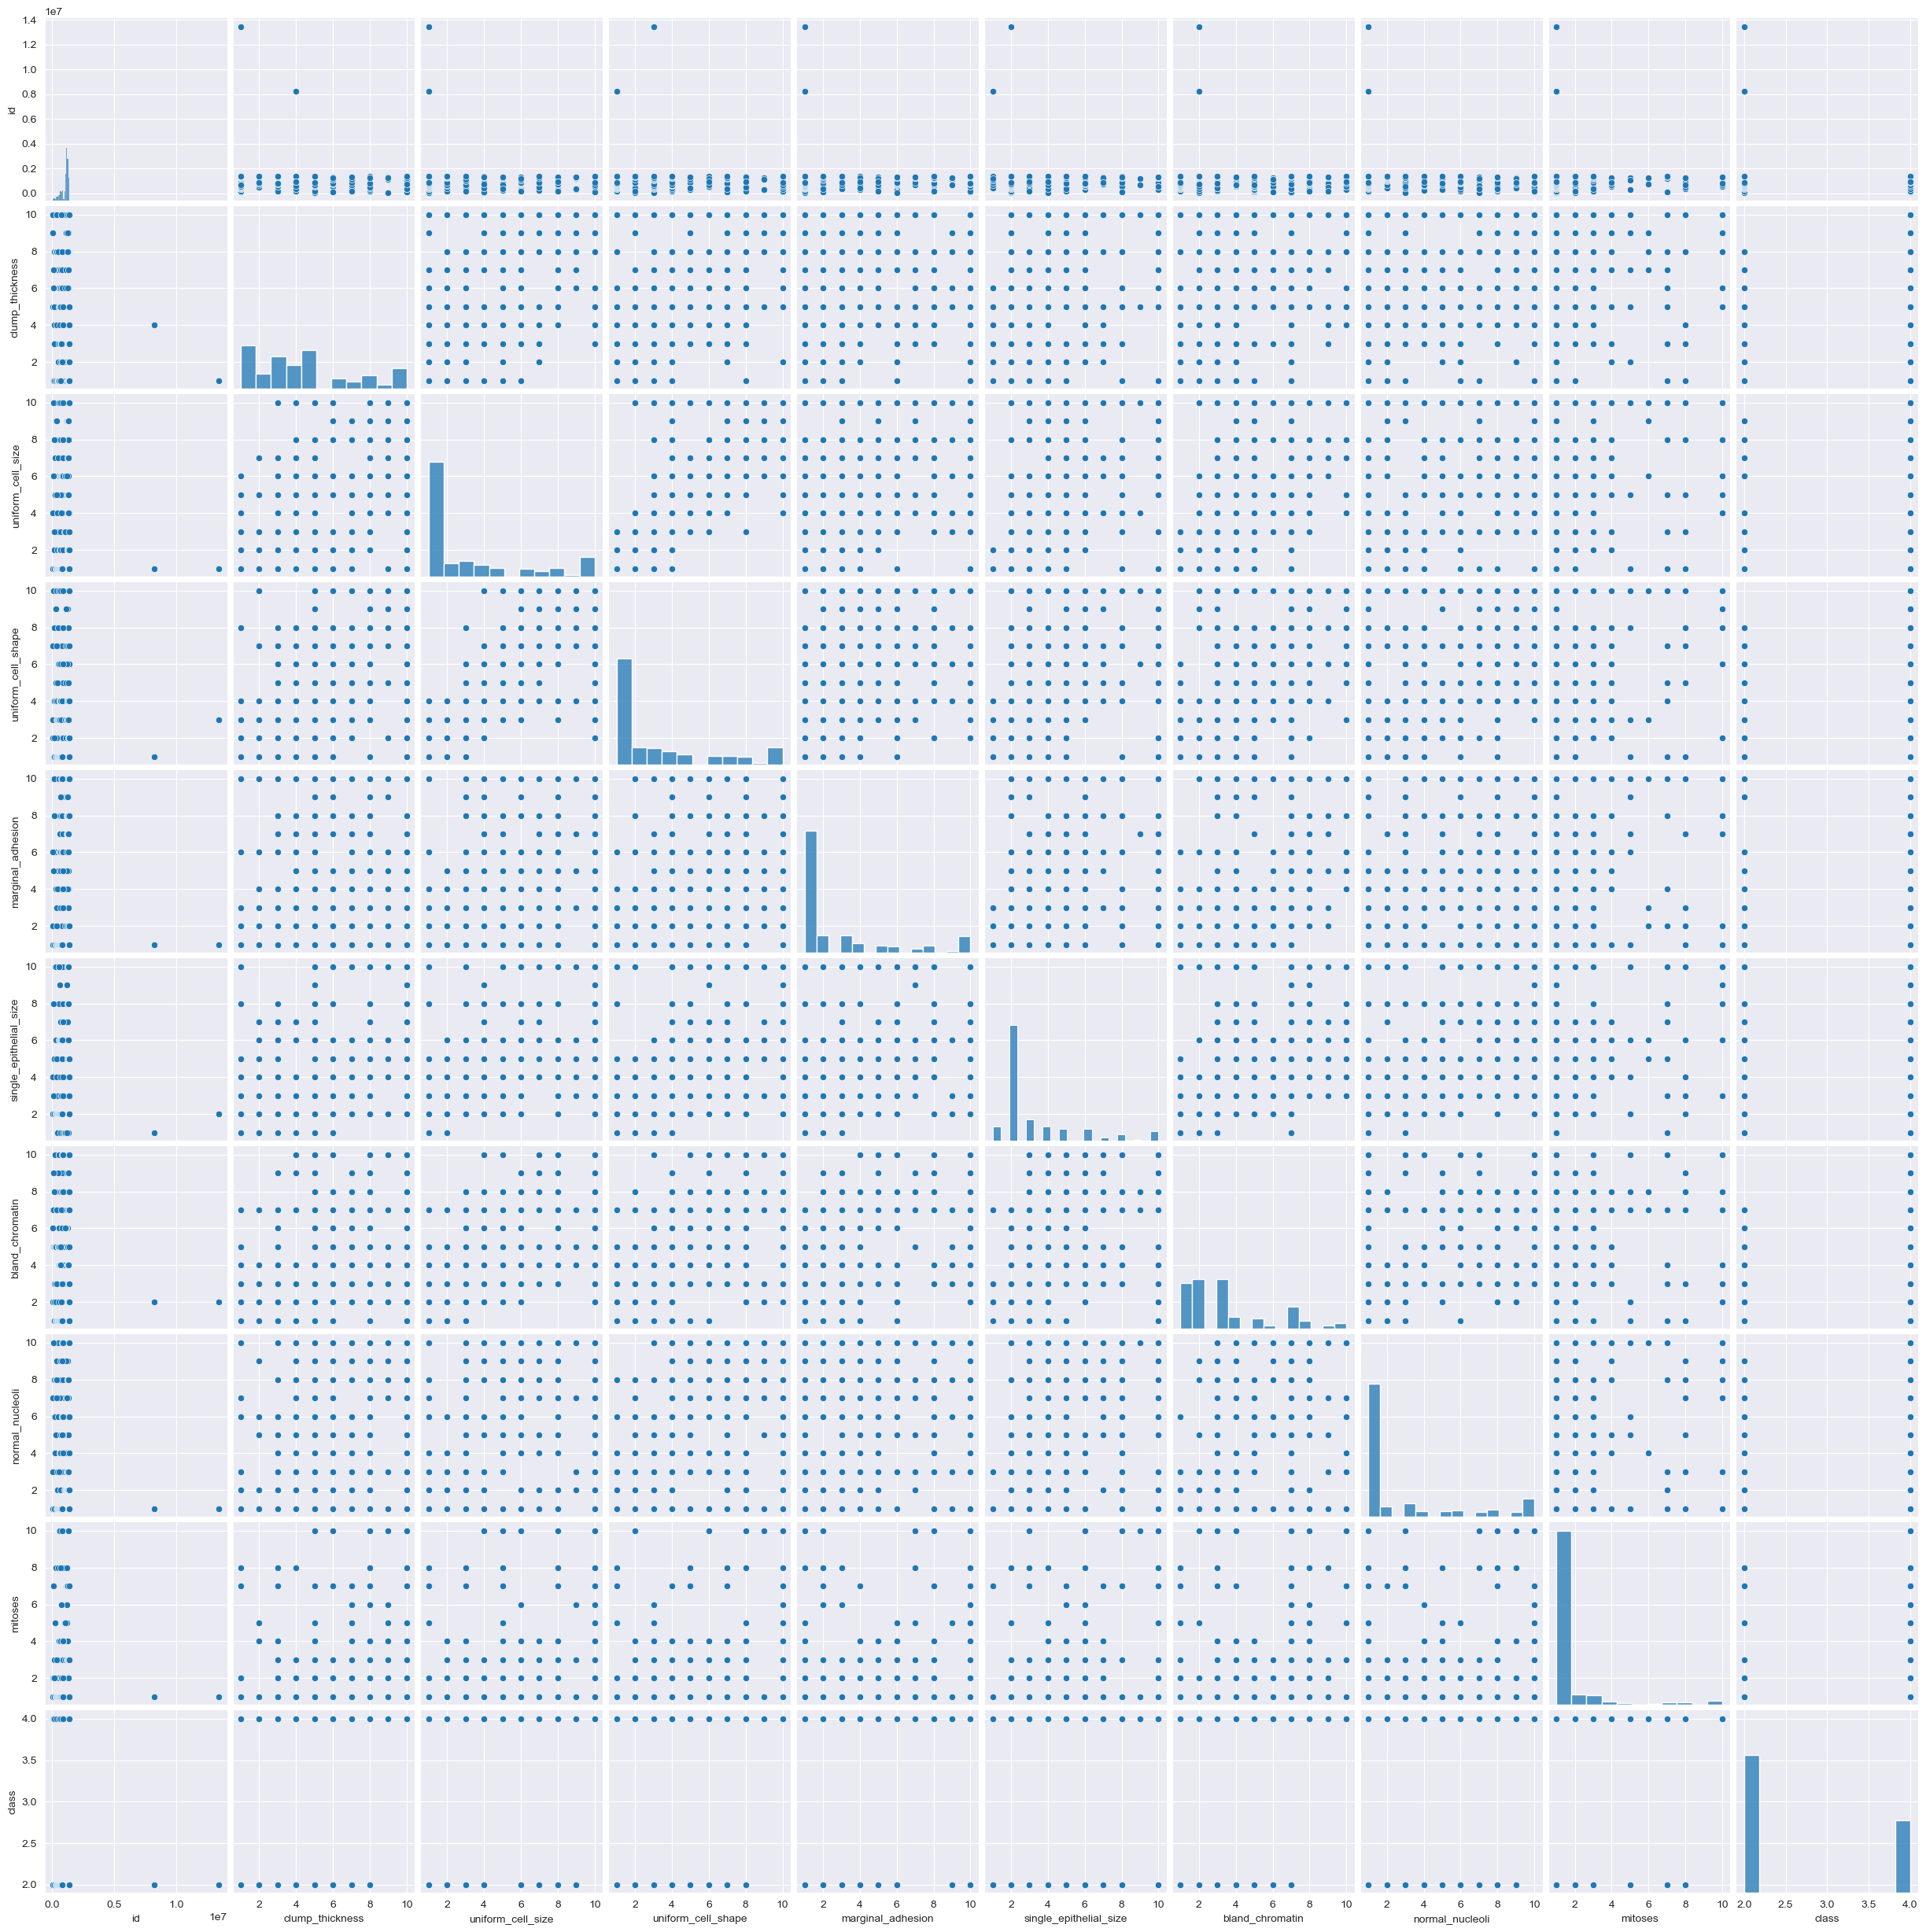

In [25]:
# Pairplot without hue
import seaborn as sns
sns.pairplot(df_bcan)
plt.show()

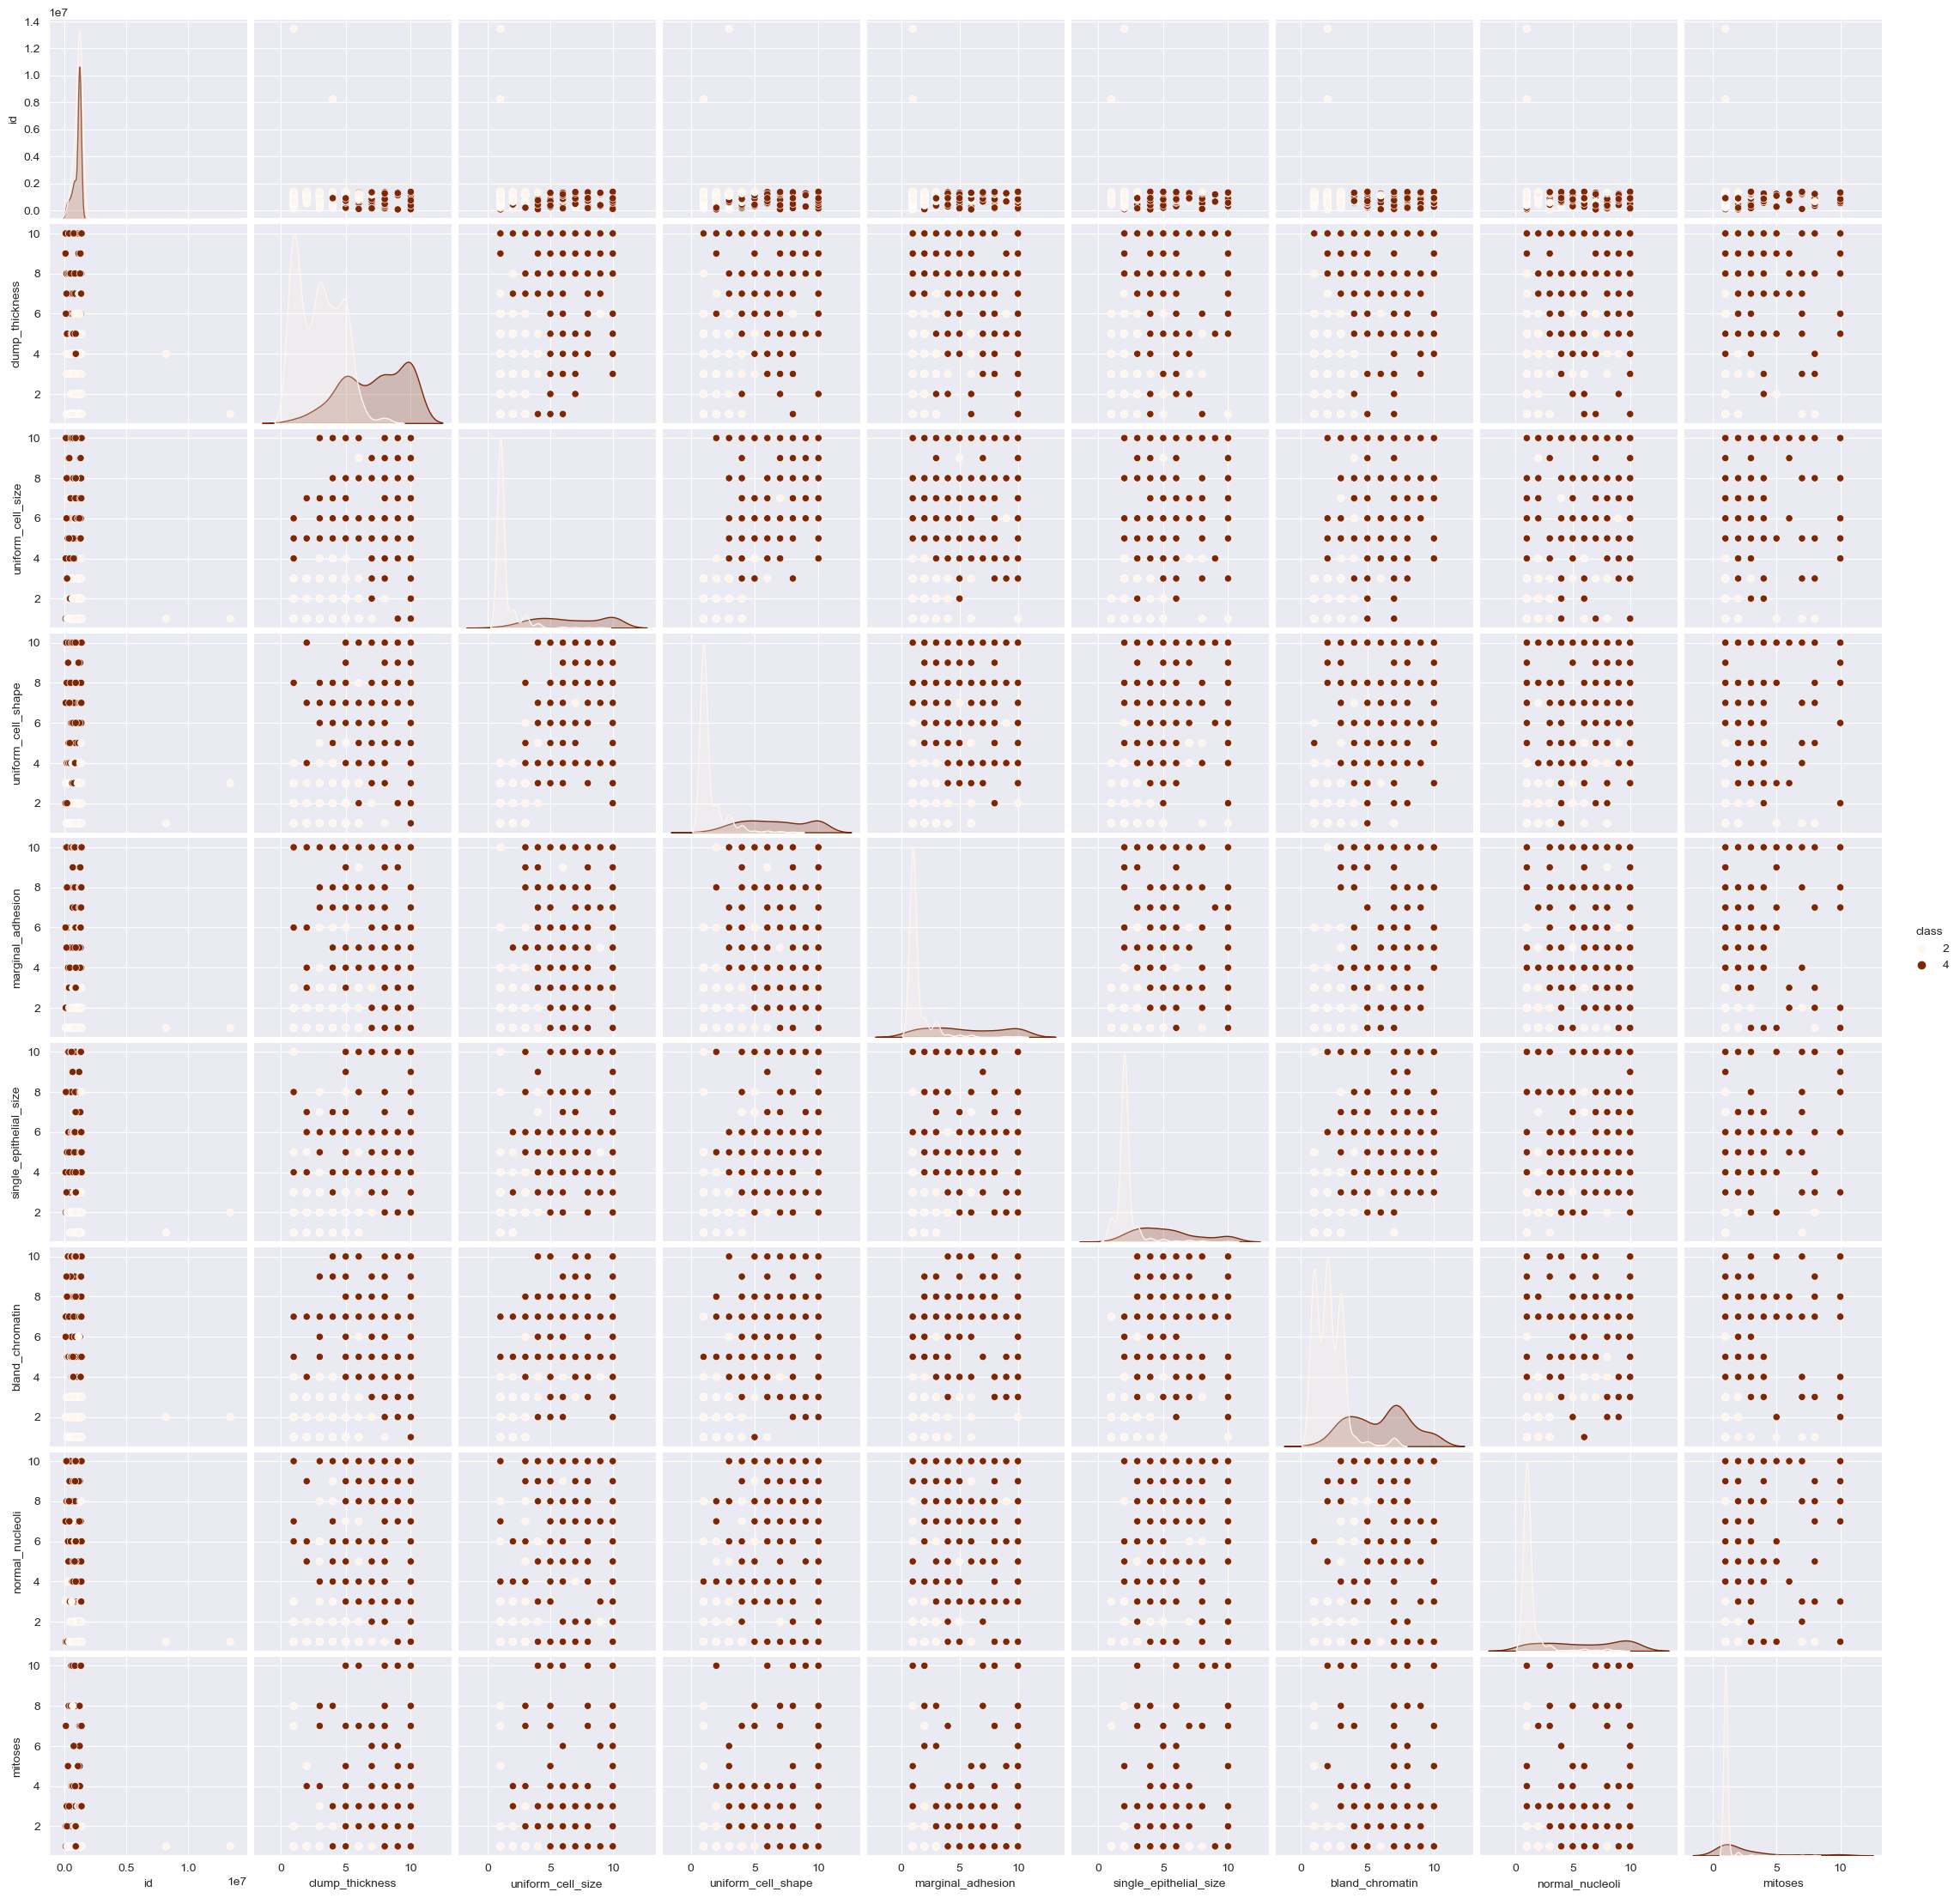

In [26]:
# Pairplot without hue
import seaborn as sns
sns.pairplot(df_bcan, hue='class', palette='Oranges')
plt.show()

In [27]:
corr_matrix = df_bcan.corr()
corr_matrix

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


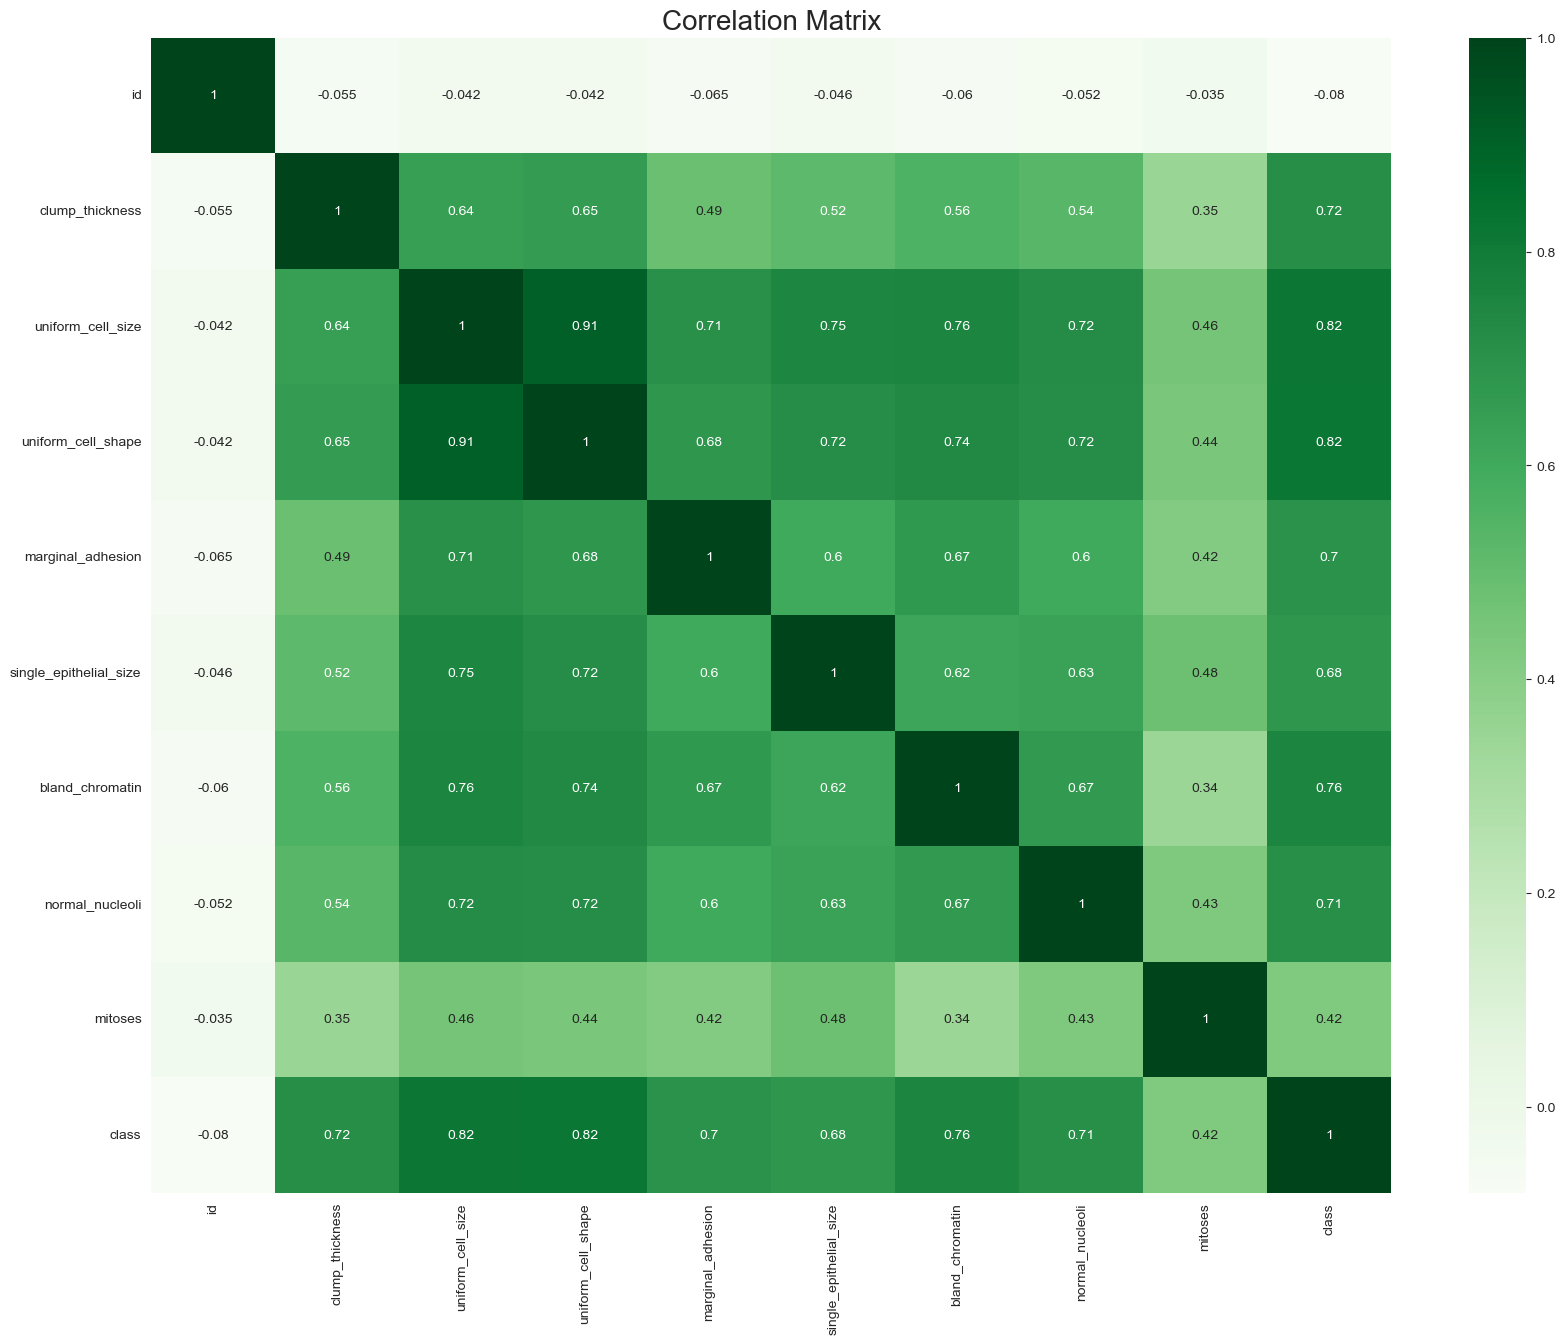

In [28]:
# Correlation matrix graph of the data set
plt.figure(figsize= [20,15])
ax = sns.heatmap(df_bcan.corr(), annot=True, cmap = "Greens" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

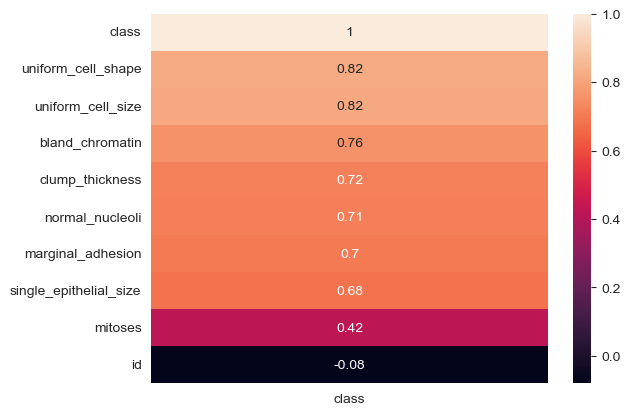

In [29]:
## performing the correlation of attributes with the target variable

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_bcan.corr()
sns.heatmap(corr_matrix[['class']].sort_values(by='class', ascending=False), annot=True)
plt.show()

In [30]:
df_bcan = df_bcan.drop('id', axis=1)

In [31]:
for col in df_bcan.columns:
    if df_bcan[col].astype(str).str.contains('\?').any():
        print(f"Column '{col}' contains '?'")
    else:
        print(f"Column '{col}' does not contain '?'")

Column 'clump_thickness' does not contain '?'
Column 'uniform_cell_size' does not contain '?'
Column 'uniform_cell_shape' does not contain '?'
Column 'marginal_adhesion' does not contain '?'
Column 'single_epithelial_size' does not contain '?'
Column 'bare_nuclei' contains '?'
Column 'bland_chromatin' does not contain '?'
Column 'normal_nucleoli' does not contain '?'
Column 'mitoses' does not contain '?'
Column 'class' does not contain '?'


In [32]:
count = df_bcan['bare_nuclei'].str.count('\?').sum()
print(f"There are {count} '?' characters in the 'bare_nuclei' column.")

There are 16 '?' characters in the 'bare_nuclei' column.


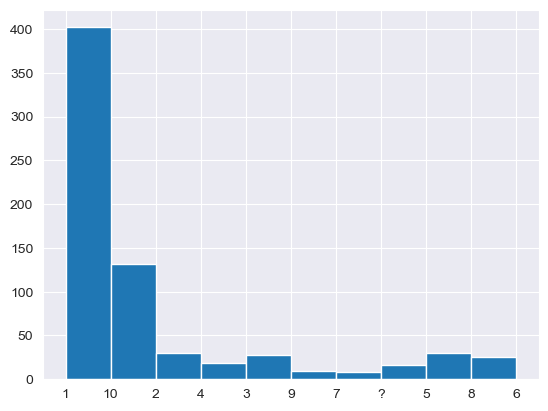

In [33]:
plt.hist(df_bcan['bare_nuclei'])
plt.show()

In [34]:
import numpy as np

df_bcan['bare_nuclei'] = df_bcan['bare_nuclei'].replace('?', np.nan)

df_bcan['bare_nuclei'] = pd.to_numeric(df_bcan['bare_nuclei'])

median = df_bcan['bare_nuclei'].median()

# Fill in the NaN values with the median
df_bcan['bare_nuclei'] = df_bcan['bare_nuclei'].fillna(median)


# Modelling Building and Performance Evaluation

In [35]:
df_bcan

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [36]:
from sklearn.model_selection import train_test_split

X = df_bcan.drop("class", axis=1)
y = df_bcan["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((559, 9), (559,))

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a logistic regression model on the resampled data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Evaluate the performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the performance on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9677996422182469
Testing Accuracy: 0.9642857142857143
Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        95
           4       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix:
[[94  1]
 [ 4 41]]


In [39]:
from sklearn.neighbors import KNeighborsClassifier

accuracy=[]
k_val = range(1,10)
for i in k_val:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    accuracy.append(pred_i)

    
accuracy

[array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2,
        4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
        4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
        2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2,
        4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
        2, 2, 4, 2, 4, 2, 2, 2]),
 array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2,
        2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
        4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
        2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2,
        4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
        2, 2, 4, 2, 4, 2, 2, 2]),
 array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier

# Define the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVM_model", SVC(probability=True)),
]

# Train and evaluate the performance of each model
for name, model in models:
    print("Training and evaluating:", name)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the performance on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Training Accuracy:", train_accuracy)
    print('\n')

    # Evaluate the performance on the testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Testing Accuracy:", test_accuracy)
    print('\n')
    
    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print('\n')
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print('------------------------------------')
    print('\n')


Training and evaluating: Logistic Regression
Training Accuracy: 0.9677996422182469


Testing Accuracy: 0.9642857142857143


Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        95
           4       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



Confusion Matrix:
[[94  1]
 [ 4 41]]
------------------------------------


Training and evaluating: KNN
Training Accuracy: 0.9695885509838998


Testing Accuracy: 0.9714285714285714


Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97  

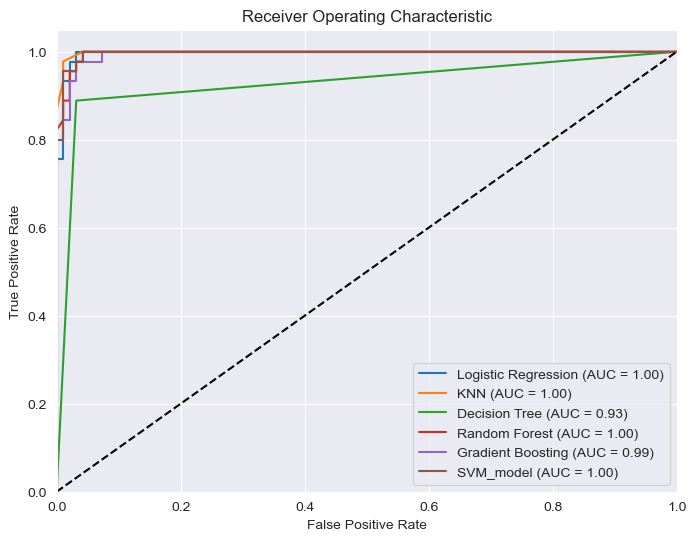

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, model in models:
    y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=4)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

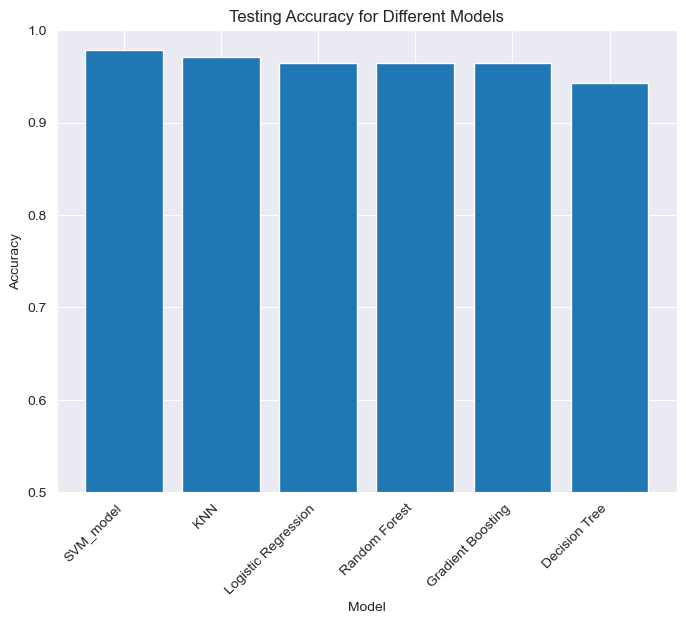

In [42]:
from sklearn.metrics import accuracy_score

# Append testing accuracy for each model
accuracy_scores = []
for name, model in models:
    y_test_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores.append((name, accuracy))

# Plot graph
import matplotlib.pyplot as plt

accuracy_scores.sort(key=lambda x: x[1], reverse=True)
names = [name for name, _ in accuracy_scores]
accuracy = [acc for _, acc in accuracy_scores]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(names, accuracy)
ax.set_title('Testing Accuracy for Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.5, 1])
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)

y_test_pred = svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.9785714285714285


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

y_test_pred = rfc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.9642857142857143


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_test_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.9714285714285714


In [46]:
## Saving model to disk

filename1 = 'model1.sav'
filename2 = 'model2.sav'
filename3 = 'model3.sav'

pickle.dump(svc, open(filename1, 'wb'))
pickle.dump(rfc, open(filename2, 'wb'))
pickle.dump(knn, open(filename3, 'wb'))

In [47]:
# Save the scaler object to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [48]:
import os

print(os.getcwd())

/Users/vishesh/Documents/Major-Project-Deployment/Pages
